In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = ResNet50(weights='imagenet')

## 2. Use loaded model to predict (Sample)

In [4]:
img_path = 'image19.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03792782', 'mountain_bike', 0.9408979), ('n03208938', 'disk_brake', 0.054900486), ('n02835271', 'bicycle-built-for-two', 0.0010376368)]


In [5]:
res = decode_predictions(preds, top=3)[0]
print(res[0][1])
    
# predset = dict([(res[0][1],res[0][2]), (res[1][1],res[1][2]), (res[2][1],res[2][2])])
# predset['null'] += 0.67
# predset

mountain_bike


## 3. Play around with directory to get number of frames inside the folder

In [7]:
import os, os.path

# simple version for working with CWD
# print (len([name for name in os.listdir('./frames/') if os.path.isfile(name)]))

DIR = './deep-learning-models/frames'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

2014


## 4. Extract 5 frames for prediction

In [8]:
import random


def getRandomImagesIndex(path, number):
    IMAGE_PATHS = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            IMAGE_PATHS.append(os.path.join(path, file))
    
    totalImage = len(IMAGE_PATHS)
    random_index = random.sample(range(totalImage), number)
    return IMAGE_PATHS, random_index

In [9]:
impath, imindex = getRandomImagesIndex(DIR, 5)
print(imindex)

imgall = []
predset = dict()

for index in imindex:
    tempimg = image.load_img(impath[index], target_size=(224, 224))
    tempx = image.img_to_array(tempimg)
    tempx = np.expand_dims(tempx, axis=0)
    tempx = preprocess_input(tempx)
    
    temppreds = model.predict(tempx)
    tempres = decode_predictions(temppreds, top=3)[0]
    
    for i in range(3):
        if tempres[i][1] in predset:
            predset[tempres[i][1]] += tempres[i][2]
        else:
            predset[tempres[i][1]] = tempres[i][2]
            


[1371, 1943, 394, 1924, 1274]


## 5. Plot the final result

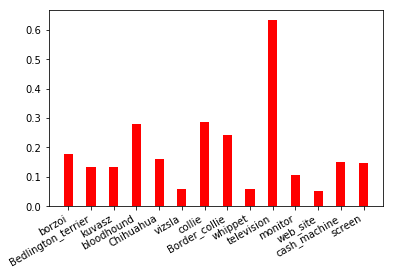

Final Prediction of the video label:  television


In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.bar(predset.keys(), predset.values(), color='r', width = 0.4)
plt.show()

sortpred = sorted(predset.items(), key=lambda x: x[1])

finallabel = sortpred[-1][0]

print('Final Prediction of the video label: ',finallabel)